# Problem Statement

### Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Data Science Problem Statement

Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

### Evaluation Metric
We will be using [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for evaluation. 

### Objective of this notebook

The main objective of this notebook is to take you through the entire working pipeline of a typical data science workflow while solving a problem. 

We will be writing modular code in form of functions, the major advantages of this are
- Functions are reusable and at a later stage, the same task can be performed again by just importing the function without explicitly having to write the same piece of code again. 
- This can save a good amount of time not only at work places but also at hackathons.
- So make sure you assemble all your lines of code within a function.

__The tasks performed below should serve as a good guide regarding the steps that you should go about while solving a problem. But kindly do not restrict yourself to only the tasks that have been performed in this notebook and feel free to bring your ideas,skills and strategies and implement them as well.__


### Word of caution

This template is just an example of a data-science pipeline, every data science problem is unique and there are multiple ways to tackle them. Go through this template and try to leverage the information in this while solving your hackathon problems but you may not be able to use all the functions created here.

# Understanding the dataset

**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets:
`train.csv` with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

`test.csv` which is the test data that consists  of 8238 observations and 20 features without the target feature

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Features**

|Feature|Feature_Type|Description|
|-----|-----|-----|
|age|numeric|age of a person|  
|job |Categorigol,nominal|type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|  
|marital|categorical,nominal|marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|  
|education|categorical,nominal| ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | 
|default|categorical,nominal| has credit in default? ('no','yes','unknown')|  
|housing|categorical,nominal| has housing loan? ('no','yes','unknown')|  
|loan|categorical,nominal| has personal loan? ('no','yes','unknown')|  
|contact|categorical,nominal| contact communication type ('cellular','telephone')|  
|month|categorical,ordinal| last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')| 
|day_of_week|categorical,ordinal| last contact day of the week ('mon','tue','wed','thu','fri')|  
|duration|numeric| last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')|
|campaign|numeric|number of contacts performed during this campaign and for this client (includes last contact)|  
|pdays|numeric| number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)|  
|previous|numeric| number of contacts performed before this campaign and for this client|  
|poutcome|categorical,nominal| outcome of the previous marketing campaign ('failure','nonexistent','success')|  
|emp.var.rate|numeric|employment variation rate - quarterly indicator|  
|cons.price.idx|numeric| consumer price index - monthly indicator|  
|cons.conf.idx|numeric| consumer confidence index - monthly indicator|  
|euribor3m|numeric|euribor 3 month rate - daily indicator|
|nr.employed|numeric| number of employees - quarterly indicator|   

**Target variable (desired output):**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|y | binary| has the client subscribed a term deposit? ('yes','no')|

###  Importing necessary libraries

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data Modelling Libraries

We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [2]:
import pip
pip.main(['install', 'xgboost'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier 
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
from os.path import dirname, abspath, join

NumExpr defaulting to 8 threads.


## Data Loading and Cleaning



### Load and Prepare dataset

- In this task, we'll load the dataframe in pandas, drop the unnecessary columns and display the top five rows of the dataset.

In [4]:
proj_dir = dirname(abspath('.'))
data_dir = join(proj_dir, 'data')
os.path.abspath(os.path.dirname('.'))


'C:\\Users\\P. R. RAJAGOPAL\\Desktop\\Ananth\\Proj\\Bank Data Analysis\\notebook'

In [5]:
path = join(data_dir,'train.csv')
# Load the dataframe
dataframe = pd.read_csv(path,delimiter=',')

# Remove the Id column from the dataset

dataframe.drop('Id',axis=1,inplace=True)
dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no


### Check Numeric and Categorical Features

If you are familiar with machine learning, you will know that a dataset consists of numerical and categorical columns.

Looking at the dataset, we think we can identify the categorical and continuous columns in it. Right? But it might also be possible that the numerical values are represented as strings in some feature. Or the categorical values in some features might be represented as some other datatypes instead of strings. Hence it's good to check for the datatypes of all the features.


In [6]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(dataframe)
print(numeric_columns)

print("===="*20)



# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(dataframe)
print("Categorical Features:")
print(categorical_columns)


# Function to check the datatypes of all the columns:
def check_datatypes(dataset):
    return dataset.dtypes


check_datatypes(dataframe)

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   49       227         4    999         0          -0.1          93.200   
1   37       202         2    999         1          -0.1          93.200   
2   78      1148         1    999         0          -1.7          94.215   
3   36       120         2    999         0           1.1          93.994   
4   59       368         2    999         0          -2.9          92.963   

   cons.conf.idx  euribor3m  nr.employed  
0          -42.0      4.120       5195.8  
1          -42.0      4.120       5195.8  
2          -40.3      0.870       4991.6  
3          -36.4      4.857       5191.0  
4          -40.8      1.262       5076.2  
Categorical Features:
            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retire

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Check Missing Data 

One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification. Hence it is necessary to identify missing values and treat them.

- In the function below, we calculate the total missing values and the percentage of missing values in every feature of the dataset.
- The function ideally returns a dataframe consisting of the feature names as index and two columns having the count and percentage of missing values in that feature.

In [7]:


# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
    return missing_data
    
    
missing_data = missing_data(dataframe)
print(missing_data)




                Total  Percent
y                   0      0.0
day_of_week         0      0.0
job                 0      0.0
marital             0      0.0
education           0      0.0
default             0      0.0
housing             0      0.0
loan                0      0.0
contact             0      0.0
month               0      0.0
duration            0      0.0
nr.employed         0      0.0
campaign            0      0.0
pdays               0      0.0
previous            0      0.0
poutcome            0      0.0
emp.var.rate        0      0.0
cons.price.idx      0      0.0
cons.conf.idx       0      0.0
euribor3m           0      0.0
age                 0      0.0


### Dropping missing values

The given dataset is a pretty clean dataset. But this might not be the case always as you can often encounter missing values represented as `NaN` values  in the data. 

There are two methods of dealing with missing data 
- Dropping them
- Imputing them.

Depending on the case we can allow a specific proportion of missing values, beyond which we might want to drop the variable from analysis.

This varies from case to case on the amount of information you think the variable has. For example, if you are working on some dataset which contains a column for date of marriage. It may be blank for 50% (or even more) of the population, but might have very high information about the lifestyle of the person. In such cases, you would still use the variable.

If the information contained in the variable is not that high, you can drop the variable if it has more than 50% missing values. There are projects / models where imputation of even 20 - 30% missing values provided better results - the famous Titanic dataset on Kaggle being one such case. Age is missing in ~20% of cases, but you benefit by imputing them rather than ignoring the variable.

- Now you have the number and percentage of missing values in every feature, from the previous function. 
- Using this information, you can decide as to what proportion of missing values you should remove from every feature.
- The function below takes a threshold value of your choice and removes the features having missing value percentage greater than this threshold. The function can take three parameters - the dataframe, missing data dataframe and threshold value.

In [8]:

# Function to drop missing values
def drop_missing(dataset, missing,value):
    dataset = dataset.drop((missing[missing['Percent'] > value]).index, axis=1)
    print(dataset.isnull().sum().sort_values(ascending=False))
    return dataset
    
    
dataframe = drop_missing(dataframe,missing_data,0.60)



y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64


### Fill null values in continuous features

There are no null values in any of the continuous columns in this dataset. But when null values exist in a continuous column, a good approach would be to impute them.

There exists many approach to missing-data imputation and they usually depend on your problem and how your data algorithm behaves. If the features are numeric you can use simple approaches, such as average values and sampling from the feature distribution.

- Missing values in continuous data are mostly imputed using mean or median. What to choose depends on a lot of factors and is to be decided by you
- Let's write a function that will take the dataframe and the impute missing data with either mean or mode, depending on the user's choice.
    - For this, we define a parameter that can take only two values 0 or 1.
    - If you specify 0 - missing values are imputed with *mean*
    - If you specify 1 - missing values are imputed with *median*

In [9]:

# Function to impute missing values with mean or median
def fill_null_values(dataset,value):
    nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
    nulls = nulls[nulls>0]
    nulls.columns = ['Null Count']
    nulls.index.name = 'Feature'
    

    for column in nulls[nulls["Null Count"]> 0].index:
        if dataset[column].dtype == np.number and value == 0:
            dataset[column].fillna(dataset[column].mean(), inplace = True)
        elif value == 1:
            dataset[column].fillna(dataset[column].median(), inplace = True)
        else:
            dataset[column].fillna("NA", inplace = True)
    print(dataset.isnull().sum())
    return dataset

dataframe=fill_null_values(dataframe,0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Check for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of **80:20 or greater** is typically considered as an imbalance for a binary classification. 

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance. 

Let's write a function below that takes the target variable and outputs the distribution of classes in the target.

In [10]:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(dataframe['y'])

no     88.734446
yes    11.265554
Name: y, dtype: float64

### Observations : 
- The class distribution in the target is ~89:11. This is a clear indication of imbalance.

### Detect outliers in the continuous columns

Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

One method of defining outliers are: outliers are data points lying beyond **(third quartile + 1.5xIQR)** and below **(first quartile - 1.5xIQR)**. 

- The function below takes a dataframe and outputs the number of outliers in every numeric feature based on the above rule of *IQR* 

You can even modify the function below to capture the outliers as per their other definitions. 

In [11]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(dataframe)

,Feature,Number of Outliers
0,age,368
1,duration,2366
2,campaign,1916
3,pdays,1226
4,previous,4534
5,emp.var.rate,0
6,cons.price.idx,0
7,cons.conf.idx,359
8,euribor3m,0
9,nr.employed,0


### Observations :
- As per the IQR methodology, there are outliers in majority of the columns.
- In the further steps below, we will see how to deal with the outliers.

## EDA & Data Visualizations

Exploratory data analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model. 

###  Univariate analysis of Categorical columns

Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.

If the variable is categorical we can use either a bar chart or a pie chart to find the distribution of the classes in the variable.

- It can get a little tedious (and boring!) to write the same piece of code for analysing the frequency of categorical variables. So why not write a single function for it and just call it whenever required.
- The function plots the frequency of all the values in the categorical variables. 


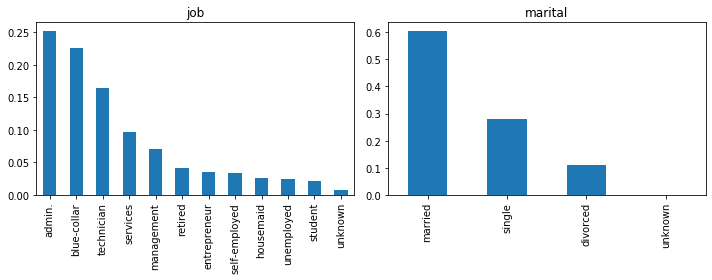

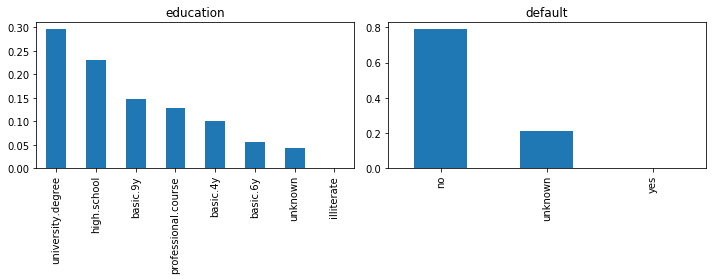

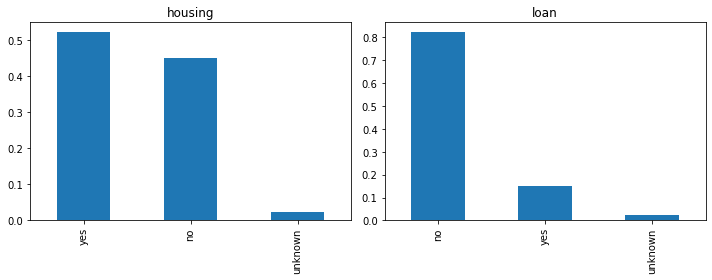

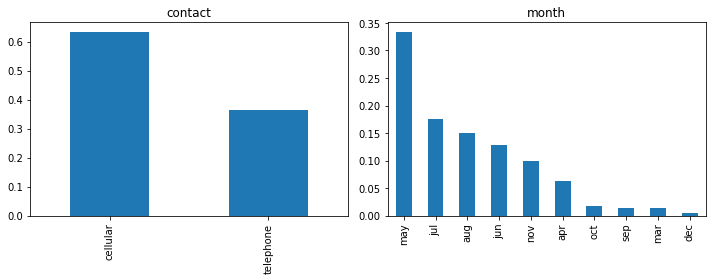

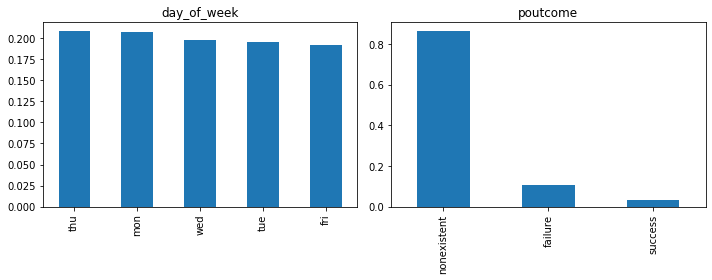

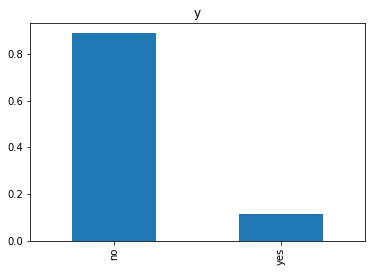

In [12]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
        
        
plot = plot_categorical_columns(dataframe)      
        


### Observations :

From the above visuals, we can make the following observations: 
- The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
- A huge number of the customers are married.
- Majority of the customers do not have a credit in default
- Many of our past customers have applied for a housing loan but very few have applied for personal loans.
- Cell-phones seem to be the most favoured method of reaching out to customers.
- Many customers have been contacted in the month of **May**.
- The plot for the target variable shows heavy imbalance in the target variable. 
- The missing values in some columns have been represented as `unknown`. `unknown` represents missing data. In the next task, we will treat these values.  

### Imputing `unknown` values of categorical columns 

In the previous task we have seen some categorical variables have a value called `unknown`. `unknown` values are a kind of missing data.
Depending on the use case, we can decide how to deal with these values. One method is to directly impute them with the mode value of respective columns.

- The function below imputes the value `unknown` in the categorical columns with the mode value of that column. You can modify this function to replace any unwanted value(for e.g `NaN` value) in a column with a value of your choice.

In [13]:

# Impute mising values of categorical data with mode
def impute_mode(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(exclude=np.number).columns:
            dataframe[col]=dataframe[col].str.replace('unknown',dataframe[col].mode()[0])
    return dataframe

dataframe = impute_mode(dataframe)


### Univariate analysis of Continuous columns
Just like for categorical columns, by performing a univariate analysis on the continuous columns, we can get a sense of the distrbution of values in every column and of the outliers in the data. Histograms are great for plotting the distribution of the data and boxplots are the best choice for visualizing outliers. 

- Let's construct two functions, one that plots a histogram of all the continuous features and other that plots a boxplot of the same.

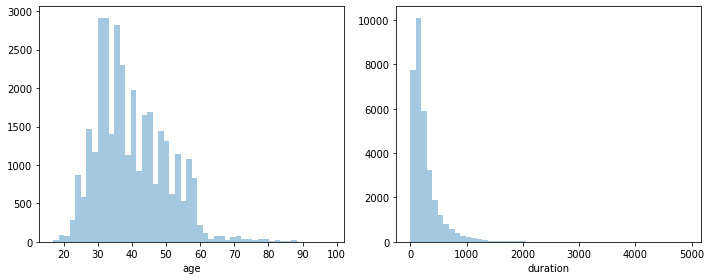

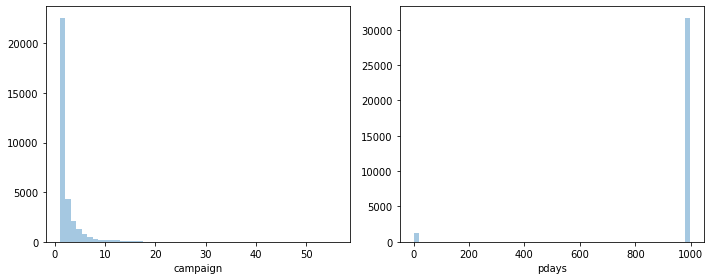

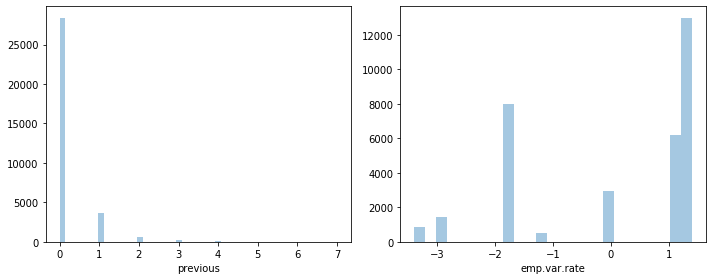

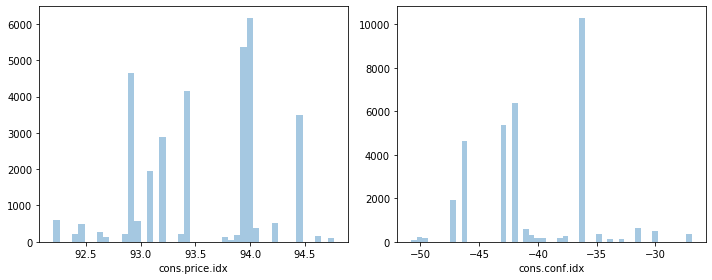

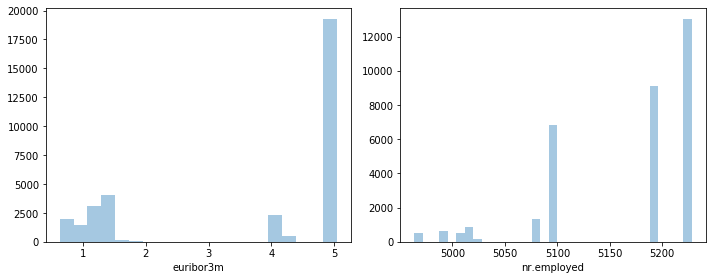

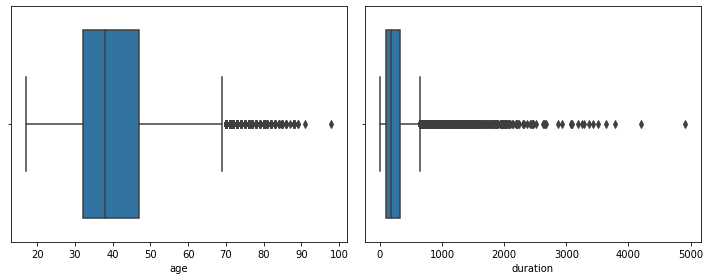

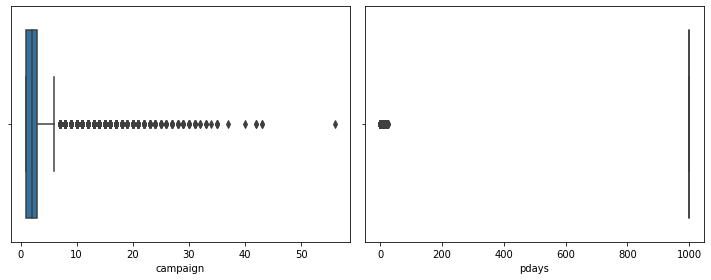

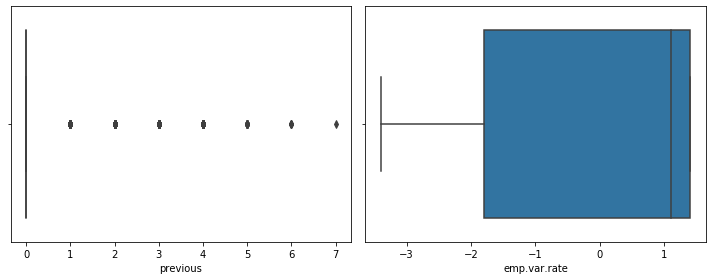

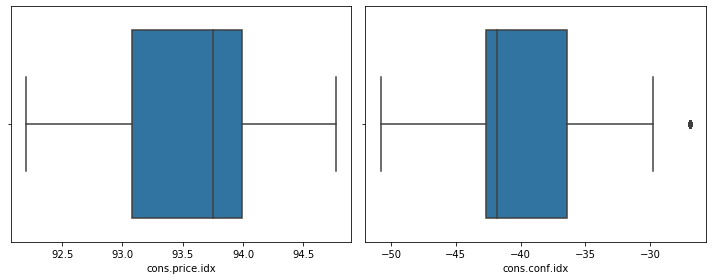

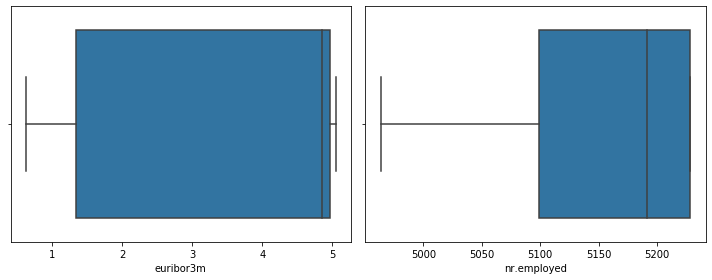

In [14]:

# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

    
    
    
plot_continuous_columns(dataframe)            
plot_box_plots(dataframe)



### Observation :

- As we can see from the histogram, the features `age`, `duration` and `campaign` are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features. We will deal with these outliers in the steps below.
- Looking at the plot for `pdays`, we can infer that majority of the customers were being contacted for the first time because as per the feature description for `pdays` the value 999 indicates that the customer had not been contacted previously. 
- Since the features `pdays` and `previous` consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

### Dropping the columns `pdays` & `previous`

In [15]:
dataframe.drop(['pdays','previous'],1,inplace=True)

### Bivariate Analysis - Categorical Columns

Bivariate analysis involves checking the relationship between two variables simultaneously. In the function below, we plot every categorical feature against the target by plotting a barchart. 

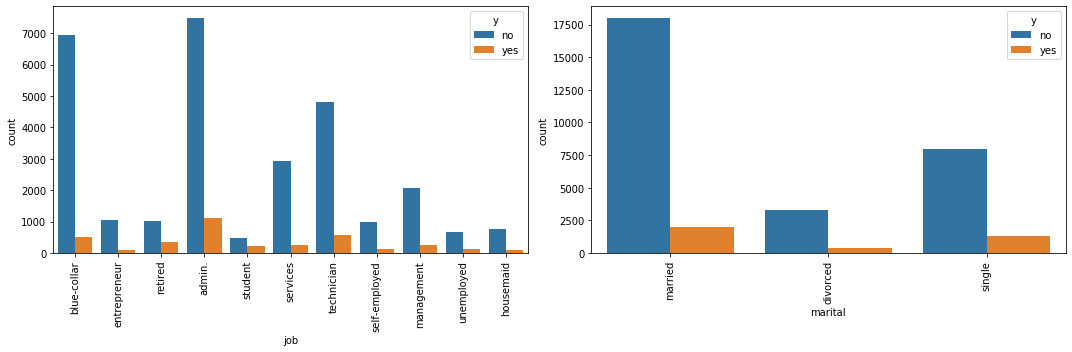

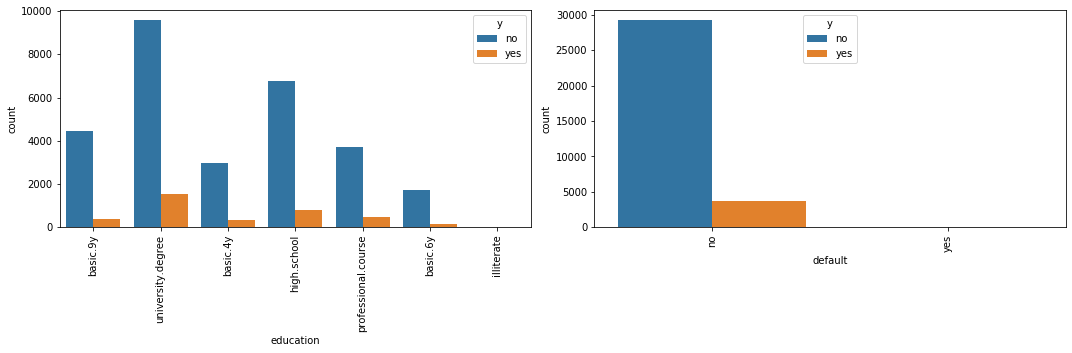

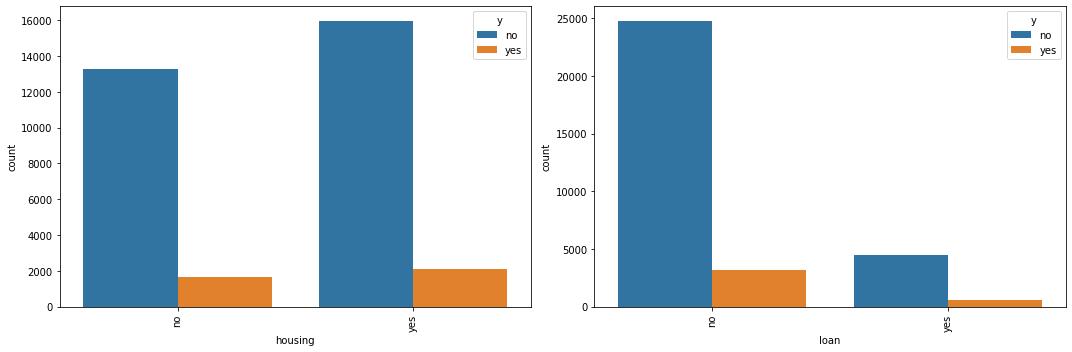

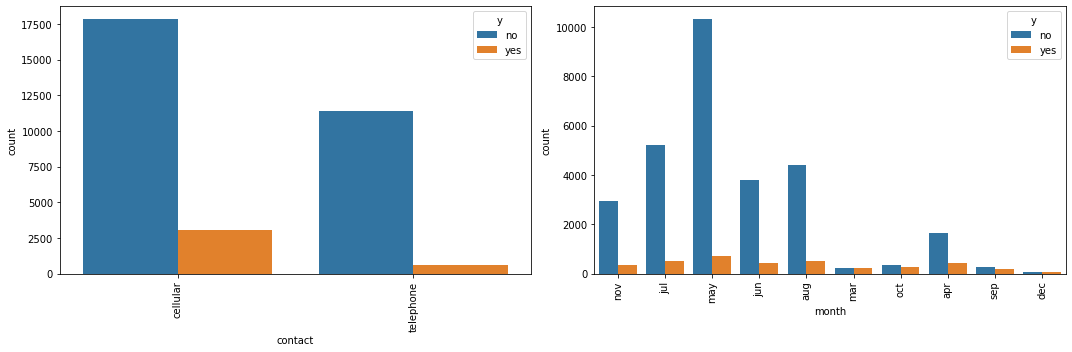

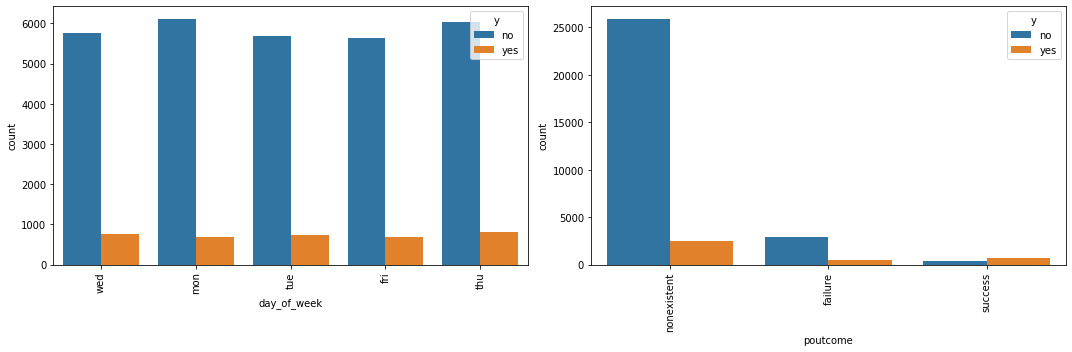

In [16]:
def bivariate_analysis_categorical(dataframe,target):
    categorical_columns = dataframe.select_dtypes(exclude=np.number).columns
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(dataframe[categorical_columns[i+1]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


bivariate_analysis_categorical(dataframe,dataframe['y'])

### Observations:

- The common traits seen for customers who have subscribed for the term deposit are :
    - Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit with technicians being the second majority.
    - They are married 
    - They hold a university degree
    - They do not hold a credit in default
    - Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
    - Cell-phones should be the preferred mode of contact for contacting customers.

### Treating outliers in the continuous columns

- Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
- To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.
- To reduce left skewness, we take squares or cubes or higher powers.
- But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.
- Hence for this data we use a method called **Winsorization**. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots. Do read up on it more [here](https://www.statisticshowto.datasciencecentral.com/winsorize/)

Lets' write a function below that treats all the outliers in the numeric features using winsorization.

In [17]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


dataframe = treat_outliers(dataframe)

# Checking for outliers after applying winsorization
detect_outliers(dataframe)

,Feature,Number of Outliers
0,age,0
1,duration,0
2,campaign,0
3,emp.var.rate,0
4,cons.price.idx,0
5,cons.conf.idx,0
6,euribor3m,0
7,nr.employed,0


### Observation :

Using winsorization has resulted in removal of all the outliers from the numerical columns.  You can even use normalization or standardization for dealing with outliers. 

## Applying vanilla models on the data

Since we have performed preprocessing on our data and also done with the EDA part, it is now time to apply vanilla machine learning models on the data and check their performance.

### Function to Label Encode Categorical variables

Before applying our machine learning algorithm, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values. Encoding of categorical variables can be performed in two ways:
- Label Encoding
- One-Hot Encoding.

For the given dataset, we are going to label encode the categorical columns. 

- In the function below we will perform label encoding on all the categorical features and also the target (since it is categorical) in the  dataset. You can modify the below function in order to perform One-Hot Encoding as well.

In [18]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset

dataframe = dummyEncode(dataframe)

### Fit vanilla classification models

Since we have label encoded our categorical variables, our data is now ready for applying machine learning algorithms. 

There are many Classification algorithms are present in machine learning, which are used for different classification applications. Some of the main classification algorithms are as follows-
- Logistic Regression
- DecisionTree Classifier
- RandomForest Classfier
- XGBClassifier
- GradientBoostingClassifier

The function we have written below takes the features, target and the classification model as the input parameters and internally splits them into training data and validation data. It then fits the classification model on the train data and then makes a prediction on the validation data and outputs the `roc_auc_score` and the `roc_curve` for this prediction.


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.60      0.34      0.43       792

    accuracy                           0.89      6590
   macro avg       0.76      0.65      0.69      6590
weighted avg       0.88      0.89      0.88      6590

ROC_AUC_SCORE is 0.6524066989313626


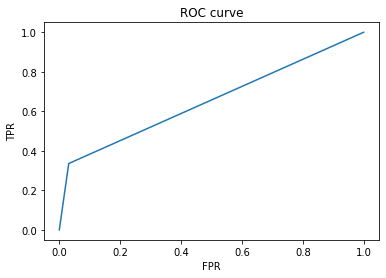

AUC Score = 65.24 %
On Model - 
Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5798
           1       0.52      0.52      0.52       792

    accuracy                           0.88      6590
   macro avg       0.73      0.73      0.73      6590
weighted avg       0.88      0.88      0.88      6590

ROC_AUC_SCORE is 0.72672743300546


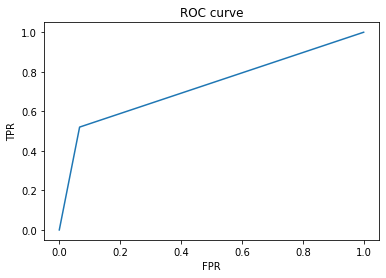

AUC Score = 72.67 %
On Model - 
Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5798
           1       0.62      0.46      0.53       792

    accuracy                           0.90      6590
   macro avg       0.78      0.71      0.74      6590
weighted avg       0.89      0.90      0.90      6590

ROC_AUC_SCORE is 0.7130062264591411


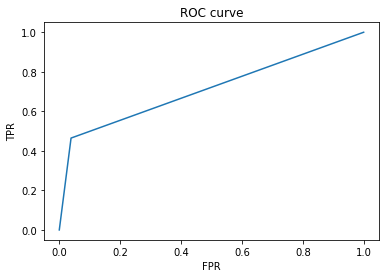

AUC Score = 71.30 %
On Model - 
Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5798
           1       0.62      0.51      0.56       792

    accuracy                           0.90      6590
   macro avg       0.78      0.73      0.75      6590
weighted avg       0.90      0.90      0.90      6590

ROC_AUC_SCORE is 0.7346400796512903


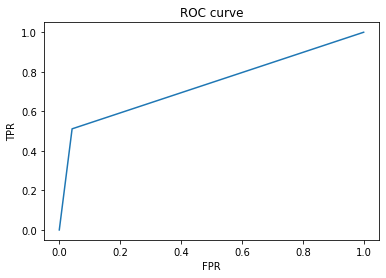

AUC Score = 73.46 %
On Model - 
XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5798
           1       0.65      0.44      0.52       792

    accuracy                           0.90      6590
   macro avg       0.79      0.70      0.73      6590
weighted avg       0.89      0.90      0.90      6590

ROC_AUC_SCORE is 0.7021356197365166


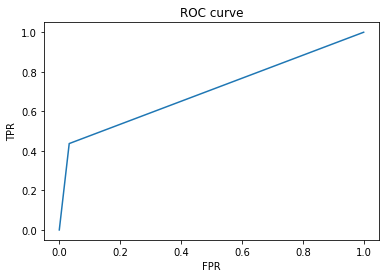

AUC Score = 70.21 %
On Model - 
Gradient Boosting


In [19]:
#from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

def run_model(predictors,target, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print('Classification Report:')
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc

# Predictors
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier}

for i in models.items():
    # run model
    model = i[1]()
    auc = run_model(X, y, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(i[0]))
    print('===='*20)
    

## Feature Selection 

Now that we have applied vanilla models on our data, we now have a basic understanding of what our predictions look like. Let's now use feature selection methods for identifying the best set of features for each model.

###  Using RFE for feature selection
In this task let's use Recursive Feature Elimination for selecting the best features. RFE is a wrapper method that uses the model to identify the best features. 

- The function  `feature selection` takes four parameters `predictors`, `target`, `model` and the `number_of_features`. The parameter `number_of_features` is used for explicitly stating the number of features you want to specify inside the RFE object. For the below task, we have inputted 8 feature. You can change this value and input the number of features you want to retain for your model


In [20]:
def feature_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Random Forest':RandomForestClassifier,'XGBoost':XGBClassifier}

# Selecting 8 number of features
for i in models.items():
    feature_selection(X,y,8,i[1])


Features  to be selected for Logistic Regression are:
['marital', 'contact', 'day_of_week', 'campaign', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m']
Features  to be selected for Random Forest are:
['age', 'job', 'education', 'day_of_week', 'duration', 'campaign', 'euribor3m', 'nr.employed']
Features  to be selected for XGBoost are:
['contact', 'duration', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Feature Selection using Random Forest

Random Forests are often used for feature selection in a data science workflow. This is because the tree based strategies that random forests use, rank the features based on how well they improve the purity of the node. The nodes having a very low impurity get split at the start of the tree while the nodes having a very high impurity get split towards the end of the tree. Hence by pruning the tree after desired amount of splits, we can create a subset of the most important features.

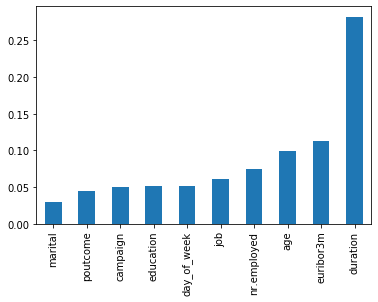

In [21]:
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42, stratify=target)
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(10)
    rfc_importances.plot(kind='bar')
    plt.show()

rfc_feature_selection(X,y)

### Observations :

We can test the features obtained from both the feature selection techniques by inserting these features to the model and depending on which set of features perform better, we can retain them for the model. 

__The Feature Selection techniques can differ from problem to problem and the techniques applied for this problem may or may not work for the other problems. In those cases, feel free to try out other methods like PCA, SelectKBest(), SelectPercentile(), tSNE etc.__

# Grid-Search & Hyperparameter Tuning 

Hyperparameters are function attributes that we have to specify for an algorithm. By now, you should be knowing that grid search is done to find out the best set of hyperparameters for your model.  

### Grid Search for Random Forest

In the below task, we write a function that performs hyperparameter tuning for a random forest classifier. We have used the hyperparameters `max_features`, `max_depth` and `criterion` for this task. Feel free to play around with this function by introducing a few more hyperparameters and chaniging their values

In [32]:
def grid_search_random_forrest(dataframe,target):

    x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
    grid_search_model.fit(x_train, y_train)
    print('Best Parameters are:')
    return grid_search_model.best_params_


grid_search_random_forrest(X,y)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

### Applying the best parameters obtained using Grid Search on Random Forest model

In the task below, we fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively. 

__Kindly note that SMOTE should always be applied only on the training data and not on the validation and test data.__

You can try experimenting with and without SMOTE and check for the difference in recall. 

In [34]:
pip.main(['install', 'imblearn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

On Validation data
ROC_AUC_SCORE is 0.8631790883420353
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8723
           1       0.44      0.88      0.58      1162

    accuracy                           0.85      9885
   macro avg       0.71      0.86      0.75      9885
weighted avg       0.92      0.85      0.87      9885



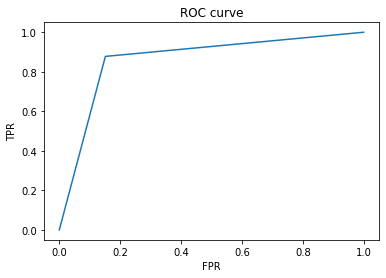

In [45]:

from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import BorderlineSMOTE
def grid_search_random_forrest_best(dataframe,target):
    
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    #Applying Smote on train data for dealing with class imbalance
    smote = BorderlineSMOTE()
    X_sm, y_sm = smote.fit_sample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation data')
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    


    

grid_search_random_forrest_best(X,y)

### Applying the grid search function for random forest only on the best features obtained using RFE

On Validation data
ROC_AUC_SCORE is 0.8656847300438056
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8723
           1       0.41      0.90      0.56      1162

    accuracy                           0.84      9885
   macro avg       0.70      0.87      0.73      9885
weighted avg       0.92      0.84      0.86      9885



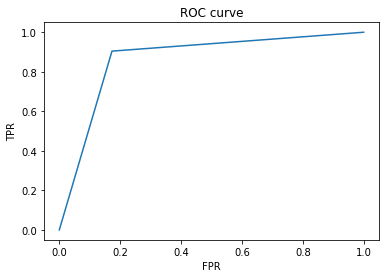

In [46]:
grid_search_random_forrest_best(X[['duration','euribor3m','age','nr.employed','job','day_of_week','campaign','education','emp.var.rate','poutcome']],y)

### Applying the grid search function for random forest only on the best features obtained using Random Forest

On Validation data
ROC_AUC_SCORE is 0.8662555595698002
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8723
           1       0.42      0.90      0.57      1162

    accuracy                           0.84      9885
   macro avg       0.70      0.87      0.74      9885
weighted avg       0.92      0.84      0.86      9885



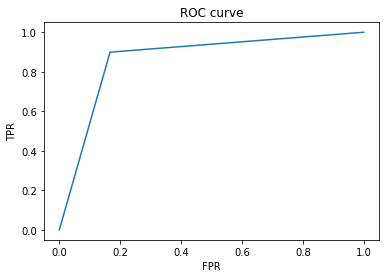

In [47]:
grid_search_random_forrest_best(X[['duration','euribor3m','age','nr.employed','job','day_of_week','campaign','education','marital','poutcome']],y)

### Using Grid Search for Logistic Regression

On Validation Data
ROC_AUC_SCORE is  0.838786781064087
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      8723
           1       0.37      0.87      0.52      1162

    accuracy                           0.81      9885
   macro avg       0.68      0.84      0.70      9885
weighted avg       0.91      0.81      0.84      9885



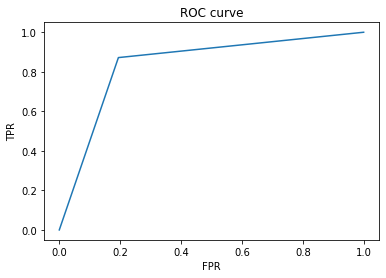

In [48]:
def grid_search_log_reg(dataframe,target):
    
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = BorderlineSMOTE()
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    log_reg = LogisticRegression()
    
    param_grid = { 
        'C' : np.logspace(-5, 8, 15)
    }
    grid_search = GridSearchCV(log_reg, param_grid=param_grid)
    
    grid_search.fit(X_sm, y_sm)
    y_pred = grid_search.predict(x_val)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation Data')
    print('ROC_AUC_SCORE is ',roc_auc_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    

grid_search_log_reg(X,y)

### Applying XGBoost model

On Validation Data
ROC_AUC_SCORE is  0.8256406836300181
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.92      8723
           1       0.47      0.77      0.58      1162

    accuracy                           0.87      9885
   macro avg       0.72      0.83      0.75      9885
weighted avg       0.91      0.87      0.88      9885

[[7723 1000]
 [ 272  890]]


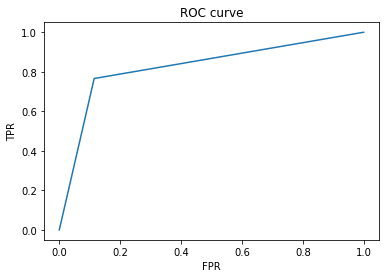

In [49]:
def xgboost(dataframe,target):
    X = dataframe
    y = target

    x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    smote = BorderlineSMOTE()
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(pd.DataFrame(X_sm,columns=x_train.columns), y_sm)
    y_pred = model.predict(x_val)
    
    print('On Validation Data')
    print('ROC_AUC_SCORE is ', roc_auc_score(y_val, y_pred))
    print('Classification Report:')
    print(classification_report(y_val, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    #     print(auc(false_positive_rate, true_positive_rate))
    
    
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    print(confusion_matrix(y_val,y_pred))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
xgboost(X,y)

## Ensembling

Ensemble learning uses multiple machine learning models  to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. In the below task, we have used an ensemble of three models - `RandomForestClassifier()`, `GradientBoostingClassifier()`, `LogisticRegression()`. Feel free to modify this function as per your requirements and fit more models or change the parameters for every model.


On Validation Data
AUC_ROC_SCORE is  0.8588384260416652
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8723
           1       0.46      0.85      0.60      1162

    accuracy                           0.87      9885
   macro avg       0.72      0.86      0.76      9885
weighted avg       0.92      0.87      0.88      9885

[[7574 1149]
 [ 175  987]]


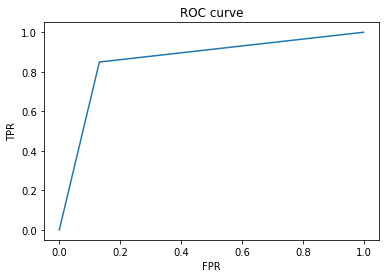

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


def ensemble_func2(dataframe,target):
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = BorderlineSMOTE()
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)

    model1 = RandomForestClassifier()
    model3 = GradientBoostingClassifier()
    model2 = LogisticRegression()
    
    model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
    model.fit(X_sm,y_sm)
    y_pred = model.predict(x_val)
    model.score(x_val,y_val)

        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation Data')
    print('AUC_ROC_SCORE is ',roc_auc_score(y_val, y_pred))
    print('Classification Report:')
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
ensemble_func2(X,y)

## Prediction on the test data

In the below task, we have performed a prediction on the test data. We have used Logistic Regression for this prediction. You can use the model of your choice that will give you the best metric score on the validation data. 

In this task below, we will read the test file and store the `Id` column from the test file in a variable `Id`. This column would be of use to us while submission since we need to have an Id column in the submission file which is the same Id of the observations in the test data.

We have to perform the same preprocessing operations on the test data that we have performed on the train data. For demonstration purposes, we have preprocessed the test data and this preprocessed data is present in the csv file `test_preprocessed.csv`

We then make a prediction on the preprocessed test data using the Grid Search Logisitic regression model. And as the final step, we concatenate this prediction with the `Id` column and then convert this into a csv file which becomes the `submission.csv` 

In [51]:
# Actual Test File
test = pd.read_csv('../data/test.csv')

# Storing the Id column
Id = test[['Id']]

# Preprocessed Test File
test = pd.read_csv('../data/test_preprocessed.csv')
test.drop('Id',1,inplace=True)
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,4,0,6,0,0,0,0,3,3,131,5,1,1.4,93.918,-42.7,4.961,5228.1
1,37,10,3,6,0,0,0,0,4,3,100,1,1,-2.9,92.963,-40.8,1.262,5076.2
2,55,5,0,5,1,2,0,0,3,2,131,2,1,-1.7,94.215,-40.3,0.810,5017.5
3,44,2,1,0,1,0,0,1,4,3,48,2,1,1.4,94.465,-41.8,4.961,5228.1
4,28,0,2,3,0,0,0,0,5,0,144,2,1,-1.8,92.843,-47.1,1.531,5099.1


In [52]:
def grid_search_log_reg(dataframe,target):


    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = BorderlineSMOTE()
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    log_reg = LogisticRegression()

    param_grid = { 
        'C' : np.logspace(-5, 8, 15)
    }
    grid_search = GridSearchCV(log_reg, param_grid=param_grid)

    grid_search.fit(X_sm, y_sm)
    
    # Predict on the preprocessed test file
    y_pred = grid_search.predict(test)
    return y_pred

    
prediction = pd.DataFrame(grid_search_log_reg(X,y),columns=['y'])
submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission.csv',index=False)